In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True)
    Download `url` if it doesn't exist to `fname` and un-tgz to folder `dest`



In [4]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet'

In [5]:
path = untar_data(URLs.PETS)
path

PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet')

In [6]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images')]

In [7]:
path_anno = path/'annotations'
path_img = path/'images'

In [8]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/pomeranian_27.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/Maine_Coon_7.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/newfoundland_29.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/shiba_inu_135.jpg'),
 PosixPath('/home/jupyter/.fastai/data/oxford-iiit-pet/images/Maine_Coon_192.jpg')]

In [9]:
np.random.seed(2)

In [10]:
pat = r'/([^/]+)_\d+.jpg$'

In [11]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224)
data.normalize(imagenet_stats)

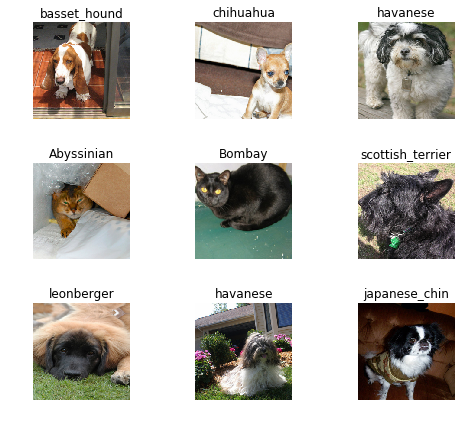

In [12]:
data.show_batch(rows=3, figsize=(7,6))

In [13]:
print(data.classes)
print(len(data.classes))
print(data.c)

['pomeranian', 'Maine_Coon', 'newfoundland', 'shiba_inu', 'beagle', 'Bengal', 'British_Shorthair', 'Egyptian_Mau', 'miniature_pinscher', 'Birman', 'english_cocker_spaniel', 'leonberger', 'Abyssinian', 'american_bulldog', 'german_shorthaired', 'Siamese', 'staffordshire_bull_terrier', 'pug', 'american_pit_bull_terrier', 'basset_hound', 'english_setter', 'Russian_Blue', 'saint_bernard', 'chihuahua', 'yorkshire_terrier', 'Ragdoll', 'havanese', 'samoyed', 'keeshond', 'scottish_terrier', 'Persian', 'Sphynx', 'japanese_chin', 'Bombay', 'wheaten_terrier', 'boxer', 'great_pyrenees']
37
37


In [14]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [15]:
learn.fit_one_cycle(4) 
# the parameter is # of cycles
# how many times do we show the data to the model

Total time: 02:07
epoch  train_loss  valid_loss  error_rate
1      1.190621    0.293906    0.085828    (00:33)
2      0.521781    0.236965    0.073187    (00:31)
3      0.323424    0.182254    0.056554    (00:31)
4      0.252249    0.177940    0.057219    (00:31)



In [16]:
learn.save('stage-1')

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

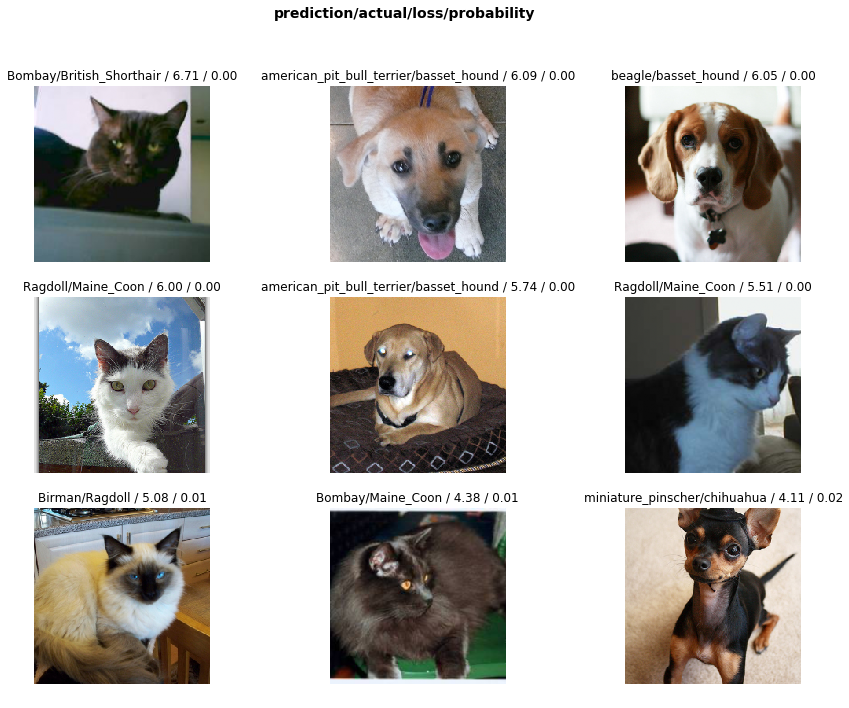

In [18]:
interp.plot_top_losses(9, figsize=(15,11))

In [19]:
doc(interp.plot_top_losses)

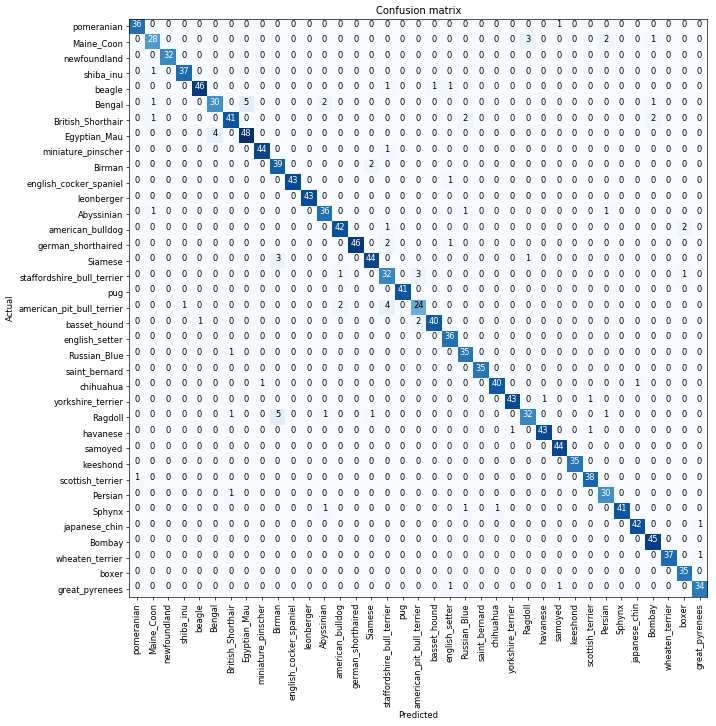

In [20]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [21]:
interp.most_confused(min_val=2)

[('Bengal', 'Egyptian_Mau', 5),
 ('Ragdoll', 'Birman', 5),
 ('Egyptian_Mau', 'Bengal', 4),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('Maine_Coon', 'Ragdoll', 3),
 ('Siamese', 'Birman', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3)]

------------

In [22]:
learn.unfreeze()

In [23]:
learn.fit_one_cycle(1)

Total time: 00:40
epoch  train_loss  valid_loss  error_rate
1      1.067572    0.576283    0.179641    (00:40)



In [29]:
learn.load('stage-1')

In [30]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


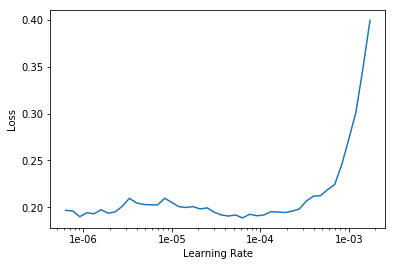

In [31]:
learn.recorder.plot()

In [32]:
learn.unfreeze()

In [33]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

Total time: 02:40
epoch  train_loss  valid_loss  error_rate
1      0.202884    0.172854    0.060546    (00:40)
2      0.190037    0.177467    0.059880    (00:39)
3      0.178053    0.167160    0.050566    (00:39)
4      0.164090    0.165132    0.053227    (00:40)

